<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Science Project
  <hr style="border-top: 1px solid #0A6EBD;">
  <i>Investigating Meteor-Related Phenomena<br>and their Association with Light Pollution</i>
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage III - EDA
</div>

In [1]:
import pandas
import os
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
logger = logging.getLogger()
logger.setLevel((logging.INFO))

handler = logging.FileHandler("log_2.txt")
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Print log messages to stdout
stream_handler = logging.StreamHandler(sys.stdout)
stream_handler.setFormatter(formatter)
stream_handler.setLevel(logging.INFO)

# Check if logger already has a handler
if not logger.handlers:
    logger.addHandler(handler)
    logger.addHandler(stream_handler)

Read the data

In [3]:
df_GMN_raw = pandas.DataFrame()

# Read all the json file in ../Data/Raw/gmn and concatenate them into df_GMN_raw
for file in os.listdir("../Data/Raw/gmn"):
    if file.endswith(".json"):
        tmp_df = pandas.read_json("../Data/Raw/gmn/" + file)
        df_GMN_raw = pandas.concat([df_GMN_raw, tmp_df], ignore_index=True)
        logger.info("File " + file + " has been read and concatenated to df_GMN_raw")

2024-01-06 08:47:39,788 - root - INFO - File 2018-12-10.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,804 - root - INFO - File 2018-12-11.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,818 - root - INFO - File 2018-12-12.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,834 - root - INFO - File 2018-12-13.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,849 - root - INFO - File 2018-12-14.json has been read and concatenated to df_GMN_raw


2024-01-06 08:47:39,861 - root - INFO - File 2018-12-15.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,872 - root - INFO - File 2018-12-18.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,882 - root - INFO - File 2018-12-19.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,893 - root - INFO - File 2018-12-20.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,908 - root - INFO - File 2018-12-21.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,918 - root - INFO - File 2018-12-22.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,930 - root - INFO - File 2018-12-23.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,940 - root - INFO - File 2018-12-24.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,949 - root - INFO - File 2018-12-26.json has been read and concatenated to df_GMN_raw
2024-01-06 08:47:39,958 - root - INFO - File 2

In [4]:
df_GMN_raw

,datetime,Vavg,Duration,Peak,PeakHt,Participating,Num,LatBeg,LonBeg,LatEnd,LonEnd,HtBeg,HtEnd,iau_code,RAapp,DECapp,Masskg
0,2018-12-10 09:32:40,34.27273,0.25,1.23,92.0256,"US0002,US0008",2,35.052966,-106.159659,35.055140,-106.153555,97.5425,89.1157,GEM,111.44139,33.30398,0.000018
1,2018-12-10 09:36:53,67.22096,0.57,-1.85,105.6624,"US0007,US0008",2,35.271967,-106.830733,35.454967,-107.071817,114.3465,95.3816,...,155.43099,-9.41475,0.000154
2,2018-12-10 09:40:42,30.35163,0.28,0.30,87.7637,"US0002,US0009",2,34.584666,-107.569102,34.583109,-107.569460,91.7361,83.3474,THA,116.92116,35.77926,0.000048
3,2018-12-10 09:45:43,31.50538,0.36,0.30,89.6319,"US0007,US0008",2,35.661923,-107.057795,35.668028,-107.046594,94.7433,84.5834,...,111.65894,31.61662,0.000060
4,2018-12-10 09:54:18,30.36280,0.40,0.71,89.2188,"US0007,US0008",2,35.452774,-107.223303,35.458019,-107.212827,95.4599,84.7777,THA,114.31161,32.14460,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158585,2024-01-01 06:44:49,39.87891,0.29,0.06,88.7692,"US0004,US000J,US000L",3,35.631850,-107.092916,35.641439,-107.159223,95.0039,86.9562,...,134.84670,22.06235,0.000035
1158586,2024-01-01 06:44:58,19.74063,0.60,1.85,88.2680,"USL007,USL008,USL00C,USL00D",4,35.054810,-111.699246,35.059732,-111.687691,92.9914,81.5538,...,83.57203,32.12437,0.000057
1158587,2024-01-01 06:45:00,63.78130,0.62,-1.39,104.2822,"US0020,USL005,USL00A,USL00B,USL00J,USL012,USL...",9,33.300850,-111.328004,33.208168,-111.672778,112.4786,99.5346,COM,171.31852,25.60149,0.000093
1158588,2024-01-01 06:47:09,56.90103,0.21,-0.53,103.7215,"UK002S,UK002U,UK0032,UK005H,UK0072,UK007M",6,52.892186,-2.159486,52.934191,-2.136482,110.5191,98.0026,...,192.17868,31.88217,0.000025


# Question 1

**Question** How mass of the oberved meteors distribute regarding geographical space and time?

**Contribution** Where is likely have high chance to see more meteors, or where is likely to be hit by asteroids/comets in the future?

**How**: Calculate average mass of observed meteors in each month of a year for each area cover 10 deg latitude.

In [5]:
# Create empty numpy 2D array. Number of columns is: the number of month from 2019-01-01 to 2023-12-31. Number of rows is: the number of bins from range -90 to 90 with step 10

mass_avg = np.zeros((19, 60))

In [6]:
# Traverse the df_GMN_raw
for i in range(len(df_GMN_raw)):
    month = df_GMN_raw.iloc[i][0].month
    year = df_GMN_raw.iloc[i][0].year
    if (year == 2018) or (year == 2024):
        continue
    # Get the index of the month in the numpy array
    month_index = (year - 2019) * 12 + month - 1
    bin_lat = df_GMN_raw.iloc[i]["LatBeg"]
    # Get the index of the bin in the numpy array
    bin_index = int((bin_lat + 90) / 10)
    # Calculate the average mass of the bin
    mass_avg[bin_index][month_index] = (mass_avg[bin_index][month_index] + df_GMN_raw.iloc[i]["Masskg"]) / 2

    # Print the progress
    if i % 1000 == 0:
        logger.info("Progress: " + str(i) + "/" + str(len(df_GMN_raw)))

C:\Users\theho\AppData\Local\Temp\ipykernel_16068\636406.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  month = df_GMN_raw.iloc[i][0].month
C:\Users\theho\AppData\Local\Temp\ipykernel_16068\636406.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = df_GMN_raw.iloc[i][0].year


2024-01-06 08:49:14,452 - root - INFO - Progress: 1000/1158590
2024-01-06 08:49:14,908 - root - INFO - Progress: 2000/1158590
2024-01-06 08:49:15,281 - root - INFO - Progress: 3000/1158590
2024-01-06 08:49:15,700 - root - INFO - Progress: 4000/1158590
2024-01-06 08:49:16,072 - root - INFO - Progress: 5000/1158590
2024-01-06 08:49:16,453 - root - INFO - Progress: 6000/1158590
2024-01-06 08:49:16,855 - root - INFO - Progress: 7000/1158590
2024-01-06 08:49:17,509 - root - INFO - Progress: 8000/1158590
2024-01-06 08:49:18,129 - root - INFO - Progress: 9000/1158590
2024-01-06 08:49:18,862 - root - INFO - Progress: 10000/1158590
2024-01-06 08:49:19,403 - root - INFO - Progress: 11000/1158590
2024-01-06 08:49:20,071 - root - INFO - Progress: 12000/1158590
2024-01-06 08:49:20,858 - root - INFO - Progress: 13000/1158590
2024-01-06 08:49:21,466 - root - INFO - Progress: 14000/1158590
2024-01-06 08:49:21,993 - root - INFO - Progress: 15000/1158590
2024-01-06 08:49:22,463 - root - INFO - Progress:

In [7]:
# Save the numpy array npy file
mass_avg = np.flip(mass_avg, 0)
np.save("../Data/Processed/mass_avg.npy", mass_avg)

Set up Heat map

In [8]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-90, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

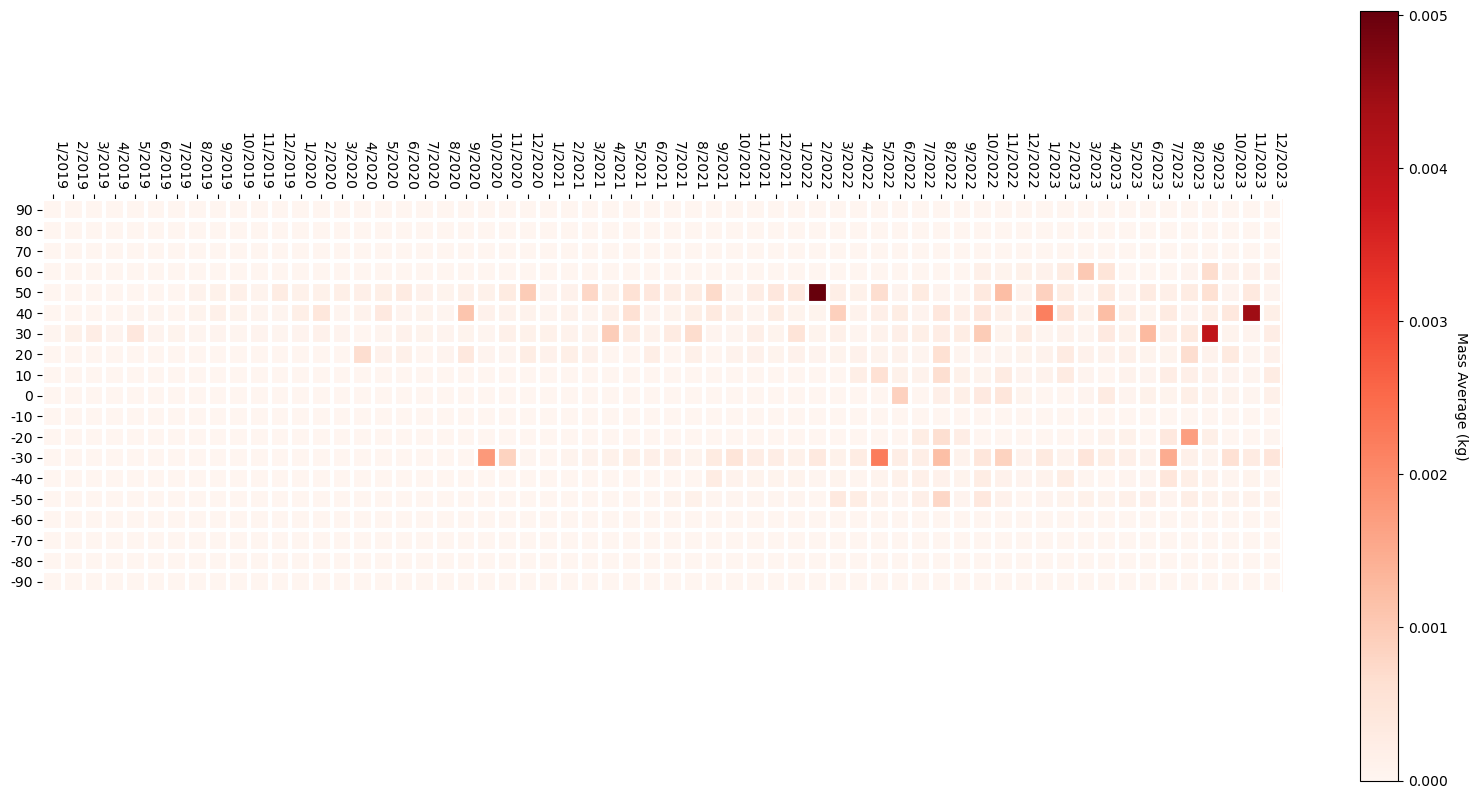

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
lat = np.arange(90, -100, -10)
monthYear = [f"{m}/{y}" for y in range(2019, 2024) for m in range(1, 13)]
im, cbar = heatmap(mass_avg, lat, monthYear, ax=ax,
                     cmap="Reds", cbarlabel="Mass Average (kg)")

plt.show()

Now, just focus on -50 to 60 latitude with step 5

In [10]:
# Create empty numpy 2D array. Number of columns is: the number of month from 2019-01-01 to 2023-12-31. Number of rows is: the number of bins from range -50 to 60 with step 5

mass_avg_2 = np.zeros((23, 60))

In [6]:
# Traverse the df_GMN_raw
for i in range(len(df_GMN_raw)):
    month = df_GMN_raw.iloc[i][0].month
    year = df_GMN_raw.iloc[i][0].year
    if (year == 2018) or (year == 2024):
        continue
    # Get the index of the month in the numpy array
    month_index = (year - 2019) * 12 + month - 1
    bin_lat = df_GMN_raw.iloc[i]["LatBeg"]
    # Get the index of the bin in the numpy array. The latitude range is from -50 to 60 with step 5
    bin_index = int((bin_lat + 50) / 5)
    # Calculate the average mass of the bin
    mass_avg_2[bin_index][month_index] = (mass_avg_2[bin_index][month_index] + df_GMN_raw.iloc[i]["Masskg"]) / 2

    # Print the progress
    if i % 1000 == 0:
        logger.info("Progress: " + str(i) + "/" + str(len(df_GMN_raw)))

C:\Users\theho\AppData\Local\Temp\ipykernel_26028\131879614.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  month = df_GMN_raw.iloc[i][0].month
C:\Users\theho\AppData\Local\Temp\ipykernel_26028\131879614.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = df_GMN_raw.iloc[i][0].year


2024-01-06 07:34:59,741 - root - INFO - Progress: 1000/1158590
2024-01-06 07:35:00,059 - root - INFO - Progress: 2000/1158590
2024-01-06 07:35:00,371 - root - INFO - Progress: 3000/1158590
2024-01-06 07:35:00,678 - root - INFO - Progress: 4000/1158590
2024-01-06 07:35:00,998 - root - INFO - Progress: 5000/1158590
2024-01-06 07:35:01,349 - root - INFO - Progress: 6000/1158590
2024-01-06 07:35:01,665 - root - INFO - Progress: 7000/1158590
2024-01-06 07:35:01,974 - root - INFO - Progress: 8000/1158590
2024-01-06 07:35:02,292 - root - INFO - Progress: 9000/1158590
2024-01-06 07:35:02,631 - root - INFO - Progress: 10000/1158590
2024-01-06 07:35:02,988 - root - INFO - Progress: 11000/1158590
2024-01-06 07:35:03,325 - root - INFO - Progress: 12000/1158590
2024-01-06 07:35:03,645 - root - INFO - Progress: 13000/1158590
2024-01-06 07:35:04,013 - root - INFO - Progress: 14000/1158590
2024-01-06 07:35:04,331 - root - INFO - Progress: 15000/1158590
2024-01-06 07:35:04,657 - root - INFO - Progress:

In [11]:
# Save the numpy array npy file
""" mass_avg_2 = np.flip(mass_avg_2, 0)
np.save("../Data/Processed/mass_avg_2.npy", mass_avg_2) """
# Load the numpy array npy file
mass_avg_2 = np.load("../Data/Processed/mass_avg_2.npy")

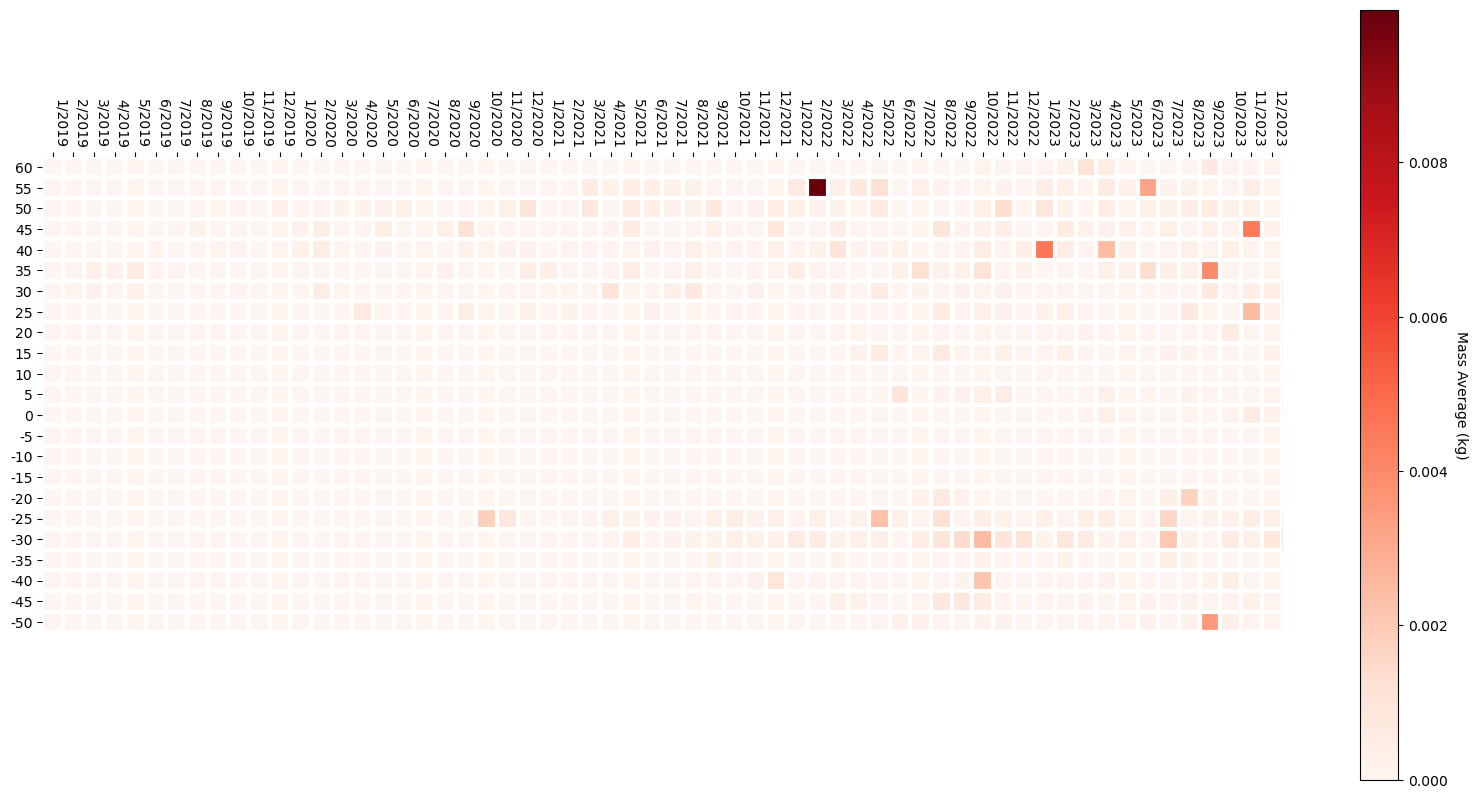

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
lat = np.arange(60, -55, -5)
monthYear = [f"{m}/{y}" for y in range(2019, 2024) for m in range(1, 13)]
im, cbar = heatmap(mass_avg_2, lat, monthYear, ax=ax,
                     cmap="Reds", cbarlabel="Mass Average (kg)")

plt.show()